In [ ]:
import os
import pandas as pd
import json

In [ ]:
folder_path = 'D:\\DSDE_Project-main\\DSDE_Project-main\\2023\\2023'

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Initialize an empty list to store DataFrames
extract_2023 = []

for file in files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        title = data['abstracts-retrieval-response']['item']['bibrecord']['head']['citation-title']
        abstract = data['abstracts-retrieval-response']['item']['bibrecord']['head']['abstracts']  
        
        # Extract country from 'author-group', handling both list and dictionary cases
        # author_group = data['abstracts-retrieval-response']['item']['bibrecord']['head']['author-group']
        # for i in author_group:
        #     if (type(i) == list):
        #         country = i[0]['affiliation']['country']
        #     else:
        #         continue
        # extract_2023.append([title,abstract,country])
        extract_2023.append([title,abstract])

# Create a DataFrame from the list of lists
df2023 = pd.DataFrame(extract_2023, columns=['Title', 'Abstract'])
df2023.dropna(inplace=True)
df2023['Abstract'] = df2023['Abstract'].str.replace('©', '')
df2023['Title_Abstract'] = df2023['Title'] + ' ' + df2023['Abstract']
df2023.drop(['Title', 'Abstract'], axis=1, inplace=True)

In [ ]:
df2023.to_csv('clean2023.csv', index=False)

In [ ]:
folder_path = 'D:\\DSDE_Project-main\\DSDE_Project-main\\2022\\2022'

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Initialize an empty list to store DataFrames
extract_2022 = []

for file in files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        title = data['abstracts-retrieval-response']['item']['bibrecord']['head']['citation-title']
        abstract = data['abstracts-retrieval-response']['item']['bibrecord']['head']['abstracts']  
        
        # Extract country from 'author-group', handling both list and dictionary cases
        # author_group = data['abstracts-retrieval-response']['item']['bibrecord']['head']['author-group']
        # for i in author_group:
        #     if (type(i) == list):
        #         country = i[0]['affiliation']['country']
        #     else:
        #         continue
        # extract_2022.append([title,abstract,country])
        extract_2022.append([title,abstract])

# Create a DataFrame from the list of lists
df2022 = pd.DataFrame(extract_2022, columns=['Title', 'Abstract'])
df2022.dropna(inplace=True)
df2022['Abstract'] = df2022['Abstract'].str.replace('©', '')
df2022['Title_Abstract'] = df2022['Title'] + ' ' + df2022['Abstract']
df2022.drop(['Title', 'Abstract'], axis=1, inplace=True)

In [ ]:
df2022.to_csv('clean2022.csv', index=False)

In [ ]:
folder_path = 'D:\\DSDE_Project-main\\DSDE_Project-main\\2021\\2021'

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Initialize an empty list to store DataFrames
extract_2021 = []

for file in files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        title = data['abstracts-retrieval-response']['item']['bibrecord']['head']['citation-title']
        abstract = data['abstracts-retrieval-response']['item']['bibrecord']['head']['abstracts']  
        
        # Extract country from 'author-group', handling both list and dictionary cases
        # author_group = data['abstracts-retrieval-response']['item']['bibrecord']['head']['author-group']
        # for i in author_group:
        #     if (type(i) == list):
        #         country = i[0]['affiliation']['country']
        #     else:
        #         continue
        # extract_2021.append([title,abstract,country])
        extract_2021.append([title,abstract])

# Create a DataFrame from the list of lists
df2021 = pd.DataFrame(extract_2021, columns=['Title', 'Abstract'])
df2021.dropna(inplace=True)
df2021['Abstract'] = df2021['Abstract'].str.replace('©', '')
df2021['Title_Abstract'] = df2021['Title'] + ' ' + df2021['Abstract']
df2021.drop(['Title', 'Abstract'], axis=1, inplace=True)

In [ ]:
df2021.to_csv('clean2021.csv', index=False)

In [ ]:
folder_path = 'D:\\DSDE_Project-main\\DSDE_Project-main\\2020\\2020'

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Initialize an empty list to store DataFrames
extract_2020 = []

for file in files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        title = data['abstracts-retrieval-response']['item']['bibrecord']['head']['citation-title']
        abstract = data['abstracts-retrieval-response']['item']['bibrecord']['head']['abstracts']  
        
        # Extract country from 'author-group', handling both list and dictionary cases
        # author_group = data['abstracts-retrieval-response']['item']['bibrecord']['head']['author-group']
        # for i in author_group:
        #     if (type(i) == list):
        #         country = i[0]['affiliation']['country']
        #     else:
        #         continue
        # extract_2020.append([title,abstract,country])
        extract_2020.append([title,abstract])

# Create a DataFrame from the list of lists
df2020 = pd.DataFrame(extract_2020, columns=['Title', 'Abstract'])
df2020.dropna(inplace=True)
df2020['Abstract'] = df2020['Abstract'].str.replace('©', '')
df2020['Title_Abstract'] = df2020['Title'] + ' ' + df2020['Abstract']
df2020.drop(['Title', 'Abstract'], axis=1, inplace=True)

In [ ]:
df2020.to_csv('clean2020.csv', index=False)

In [ ]:
folder_path = 'D:\\DSDE_Project-main\\DSDE_Project-main\\2019\\2019'

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Initialize an empty list to store DataFrames
extract_2019 = []

for file in files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        title = data['abstracts-retrieval-response']['item']['bibrecord']['head']['citation-title']
        abstract = data['abstracts-retrieval-response']['item']['bibrecord']['head']['abstracts']  
        
        # Extract country from 'author-group', handling both list and dictionary cases
        # author_group = data['abstracts-retrieval-response']['item']['bibrecord']['head']['author-group']
        # for i in author_group:
        #     if (type(i) == list):
        #         country = i[0]['affiliation']['country']
        #     else:
        #         continue
        # extract_2019.append([title,abstract,country])
        extract_2019.append([title,abstract])

# Create a DataFrame from the list of lists
df2019 = pd.DataFrame(extract_2019, columns=['Title', 'Abstract'])
df2019.dropna(inplace=True)
df2019['Abstract'] = df2019['Abstract'].str.replace('©', '')
df2019['Title_Abstract'] = df2019['Title'] + ' ' + df2019['Abstract']
df2019.drop(['Title', 'Abstract'], axis=1, inplace=True)

In [ ]:
df2019.to_csv('clean2019.csv', index=False)

In [ ]:
folder_path = 'D:\\DSDE_Project-main\\DSDE_Project-main\\2018\\2018'

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Initialize an empty list to store DataFrames
extract_2018 = []

for file in files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        title = data['abstracts-retrieval-response']['item']['bibrecord']['head']['citation-title']
        abstract = data['abstracts-retrieval-response']['item']['bibrecord']['head']['abstracts']  
        
        # Extract country from 'author-group', handling both list and dictionary cases
        # author_group = data['abstracts-retrieval-response']['item']['bibrecord']['head']['author-group']
        # for i in author_group:
        #     if (type(i) == list):
        #         country = i[0]['affiliation']['country']
        #     else:
        #         continue
        # extract_2018.append([title,abstract,country])
        extract_2018.append([title,abstract])

# Create a DataFrame from the list of lists
df2018 = pd.DataFrame(extract_2018, columns=['Title', 'Abstract'])
df2018.dropna(inplace=True)
df2018['Abstract'] = df2018['Abstract'].str.replace('©', '')
df2018['Title_Abstract'] = df2018['Title'] + ' ' + df2018['Abstract']
df2018.drop(['Title', 'Abstract'], axis=1, inplace=True)

In [ ]:
df2018.to_csv('clean2018.csv', index=False)

In [ ]:
import os
import pandas as pd
import json

# Define the folder path where your JSON files are located
folder_path = 'D:\\DSDE_Project-main\\DSDE_Project-main\\2023_test\\2023_test'

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Initialize an empty list to store DataFrames
test_2023 = []

for file in files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        title = data['abstracts-retrieval-response']['item']['bibrecord']['head']['citation-title']
        abstract = data['abstracts-retrieval-response']['item']['bibrecord']['head']['abstracts']  

        # Extract subject areas from the list of dictionaries
        subject_areas = data['abstracts-retrieval-response']['subject-areas']['subject-area']
        subject_area_names = [area['$'] for area in subject_areas]  # Extracting subject area names
        
        test_2023.append([title, abstract, subject_area_names])

# Create a DataFrame from the list of lists
df_test2023 = pd.DataFrame(test_2023, columns=['Title', 'Abstract', 'Labels'])
df_test2023.dropna(inplace=True)
df_test2023['Abstract'] = df_test2023['Abstract'].str.replace('©', '')
df_test2023['Title_Abstract'] = df_test2023['Title'] + ' ' + df_test2023['Abstract']
df_test2023.drop(['Title', 'Abstract'], axis=1, inplace=True)


In [ ]:
df_test2023.to_csv('cleantest2023.csv', index=False)

In [ ]:
import os
import pandas as pd
import json

# Define the folder path where your JSON files are located
folder_path = 'D:\\DSDE_Project-main\\DSDE_Project-main\\2022_test\\2022_test'

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Initialize an empty list to store DataFrames
test_2022 = []

for file in files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        title = data['abstracts-retrieval-response']['item']['bibrecord']['head']['citation-title']
        abstract = data['abstracts-retrieval-response']['item']['bibrecord']['head']['abstracts']  

        # Extract subject areas from the list of dictionaries
        subject_areas = data['abstracts-retrieval-response']['subject-areas']['subject-area']
        subject_area_names = [area['$'] for area in subject_areas]  # Extracting subject area names
        
        test_2022.append([title, abstract, subject_area_names])

# Create a DataFrame from the list of lists
df_test2022 = pd.DataFrame(test_2022, columns=['Title', 'Abstract', 'Labels'])
df_test2022.dropna(inplace=True)
df_test2022['Abstract'] = df_test2022['Abstract'].str.replace('©', '')
df_test2022['Title_Abstract'] = df_test2022['Title'] + ' ' + df_test2022['Abstract']
df_test2022.drop(['Title', 'Abstract'], axis=1, inplace=True)


In [ ]:
df_test2022.to_csv('cleantest2022.csv', index=False)

In [ ]:
import os
import pandas as pd
import json

# Define the folder path where your JSON files are located
folder_path = 'D:\\DSDE_Project-main\\DSDE_Project-main\\2021_test\\2021_test'

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Initialize an empty list to store DataFrames
test_2021 = []

for file in files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        title = data['abstracts-retrieval-response']['item']['bibrecord']['head']['citation-title']
        abstract = data['abstracts-retrieval-response']['item']['bibrecord']['head']['abstracts']  

        # Extract subject areas from the list of dictionaries
        subject_areas = data['abstracts-retrieval-response']['subject-areas']['subject-area']
        subject_area_names = [area['$'] for area in subject_areas]  # Extracting subject area names
        
        test_2021.append([title, abstract, subject_area_names])

# Create a DataFrame from the list of lists
df_test2021 = pd.DataFrame(test_2021, columns=['Title', 'Abstract', 'Labels'])
df_test2021.dropna(inplace=True)
df_test2021['Abstract'] = df_test2021['Abstract'].str.replace('©', '')
df_test2021['Title_Abstract'] = df_test2021['Title'] + ' ' + df_test2021['Abstract']
df_test2021.drop(['Title', 'Abstract'], axis=1, inplace=True)


In [ ]:
df_test2021.to_csv('cleantest2021.csv', index=False)

In [ ]:
import os
import pandas as pd
import json

# Define the folder path where your JSON files are located
folder_path = 'D:\\DSDE_Project-main\\DSDE_Project-main\\2020_test\\2020_test'

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Initialize an empty list to store DataFrames
test_2020 = []

for file in files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        title = data['abstracts-retrieval-response']['item']['bibrecord']['head']['citation-title']
        abstract = data['abstracts-retrieval-response']['item']['bibrecord']['head']['abstracts']  

        # Extract subject areas from the list of dictionaries
        subject_areas = data['abstracts-retrieval-response']['subject-areas']['subject-area']
        subject_area_names = [area['$'] for area in subject_areas]  # Extracting subject area names
        
        test_2020.append([title, abstract, subject_area_names])

# Create a DataFrame from the list of lists
df_test2020 = pd.DataFrame(test_2020, columns=['Title', 'Abstract', 'Labels'])
df_test2020.dropna(inplace=True)
df_test2020['Abstract'] = df_test2020['Abstract'].str.replace('©', '')
df_test2020['Title_Abstract'] = df_test2020['Title'] + ' ' + df_test2020['Abstract']
df_test2020.drop(['Title', 'Abstract'], axis=1, inplace=True)


In [ ]:
df_test2020.to_csv('cleantest2020.csv', index=False)

In [ ]:
import os
import pandas as pd
import json

# Define the folder path where your JSON files are located
folder_path = 'D:\\DSDE_Project-main\\DSDE_Project-main\\2019_test\\2019_test'

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Initialize an empty list to store DataFrames
test_2019 = []

for file in files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        title = data['abstracts-retrieval-response']['item']['bibrecord']['head']['citation-title']
        abstract = data['abstracts-retrieval-response']['item']['bibrecord']['head']['abstracts']  

        # Extract subject areas from the list of dictionaries
        subject_areas = data['abstracts-retrieval-response']['subject-areas']['subject-area']
        subject_area_names = [area['$'] for area in subject_areas]  # Extracting subject area names
        
        test_2019.append([title, abstract, subject_area_names])

# Create a DataFrame from the list of lists
df_test2019 = pd.DataFrame(test_2019, columns=['Title', 'Abstract', 'Labels'])
df_test2019.dropna(inplace=True)
df_test2019['Abstract'] = df_test2019['Abstract'].str.replace('©', '')
df_test2019['Title_Abstract'] = df_test2019['Title'] + ' ' + df_test2019['Abstract']
df_test2019.drop(['Title', 'Abstract'], axis=1, inplace=True)


In [ ]:
df_test2019.to_csv('cleantest2019.csv', index=False)

In [ ]:
import os
import pandas as pd
import json

# Define the folder path where your JSON files are located
folder_path = 'D:\\DSDE_Project-main\\DSDE_Project-main\\2018_test\\2018_test'

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Initialize an empty list to store DataFrames
test_2018 = []

for file in files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        title = data['abstracts-retrieval-response']['item']['bibrecord']['head']['citation-title']
        abstract = data['abstracts-retrieval-response']['item']['bibrecord']['head']['abstracts']  

        # Extract subject areas from the list of dictionaries
        subject_areas = data['abstracts-retrieval-response']['subject-areas']['subject-area']
        subject_area_names = [area['$'] for area in subject_areas]  # Extracting subject area names
        
        test_2018.append([title, abstract, subject_area_names])

# Create a DataFrame from the list of lists
df_test2018 = pd.DataFrame(test_2018, columns=['Title', 'Abstract', 'Labels'])
df_test2018.dropna(inplace=True)
df_test2018['Abstract'] = df_test2018['Abstract'].str.replace('©', '')
df_test2018['Title_Abstract'] = df_test2018['Title'] + ' ' + df_test2018['Abstract']
df_test2018.drop(['Title', 'Abstract'], axis=1, inplace=True)


In [ ]:
df_test2018.to_csv('cleantest2018.csv', index=False)

In [ ]:
df_test2018

In [235]:
labels = []
labels.extend(df_test2018["Labels"])
labels.extend(df_test2019["Labels"])
labels.extend(df_test2020["Labels"])
labels.extend(df_test2021["Labels"])
labels.extend(df_test2022["Labels"])
labels.extend(df_test2023["Labels"])

In [245]:
import re


In [274]:
clean_label = [re.sub(r'(.*?)','', " ".join(t).replace("(all)", "").replace("and", "").replace(",", "").replace("of", "").replace("the", "").strip()) for t in labels]
clean_label = [re.sub(r'\(.*?\)','', " ".join(t).replace("(all)", "").replace("and", "").replace(",", "").replace("of", "").replace("the", "").strip()) for t in labels]
labelize = [set(e.strip().split()) for e in clean_label]

In [275]:
all_labels = []
for s in labelize:
    all_labels.extend(list(s))

In [276]:
all_labels

['Electronic',
 'Electrical',
 'Optical',
 'Engineering',
 'Materials',
 'Magnetic',
 'Manufacturing',
 'Chemical',
 'Industrial',
 'Engineering',
 'Chemistry',
 'Matter',
 'Astronomy',
 'Interfaces',
 'Physics',
 'Surfaces',
 'Coatings',
 'Chemistry',
 'Films',
 'Condensed',
 'Biochemistry',
 'Environmental',
 'Spectroscopy',
 'Chemistry',
 'Analytical',
 'Business',
 'International',
 'Strategy',
 'Human',
 'Resource',
 'Behavior',
 'Management',
 'Organizational',
 'Genetics',
 'Aerospace',
 'Artificial',
 'Sciences',
 'Systems',
 'Intelligence',
 'Engineering',
 'Information',
 'Materials',
 'Decision',
 'Mechanics',
 'Management',
 'Matter',
 'Interfaces',
 'Physics',
 'Surfaces',
 'Electrochemistry',
 'Spectroscopy',
 'Materials',
 'Science',
 'Condensed',
 'Matter',
 'Interfaces',
 'Physics',
 'Surfaces',
 'Coatings',
 'Materials',
 'Chemistry',
 'Films',
 'Condensed',
 'Networks',
 'Applications',
 'Signal',
 'Processing',
 'Artificial',
 'Systems',
 'Intelligence',
 'Communica

In [277]:
from collections import Counter

count = Counter(all_labels)
count

Counter({'Electronic': 47,
         'Electrical': 36,
         'Optical': 21,
         'Engineering': 292,
         'Materials': 126,
         'Magnetic': 21,
         'Manufacturing': 29,
         'Chemical': 67,
         'Industrial': 29,
         'Chemistry': 234,
         'Matter': 44,
         'Astronomy': 85,
         'Interfaces': 10,
         'Physics': 158,
         'Surfaces': 20,
         'Coatings': 17,
         'Films': 17,
         'Condensed': 44,
         'Biochemistry': 93,
         'Environmental': 144,
         'Spectroscopy': 22,
         'Analytical': 33,
         'Business': 18,
         'International': 13,
         'Strategy': 18,
         'Human': 4,
         'Resource': 4,
         'Behavior': 36,
         'Management': 101,
         'Organizational': 4,
         'Genetics': 63,
         'Aerospace': 1,
         'Artificial': 25,
         'Sciences': 57,
         'Systems': 35,
         'Intelligence': 25,
         'Information': 25,
         'Decision': 3,
  

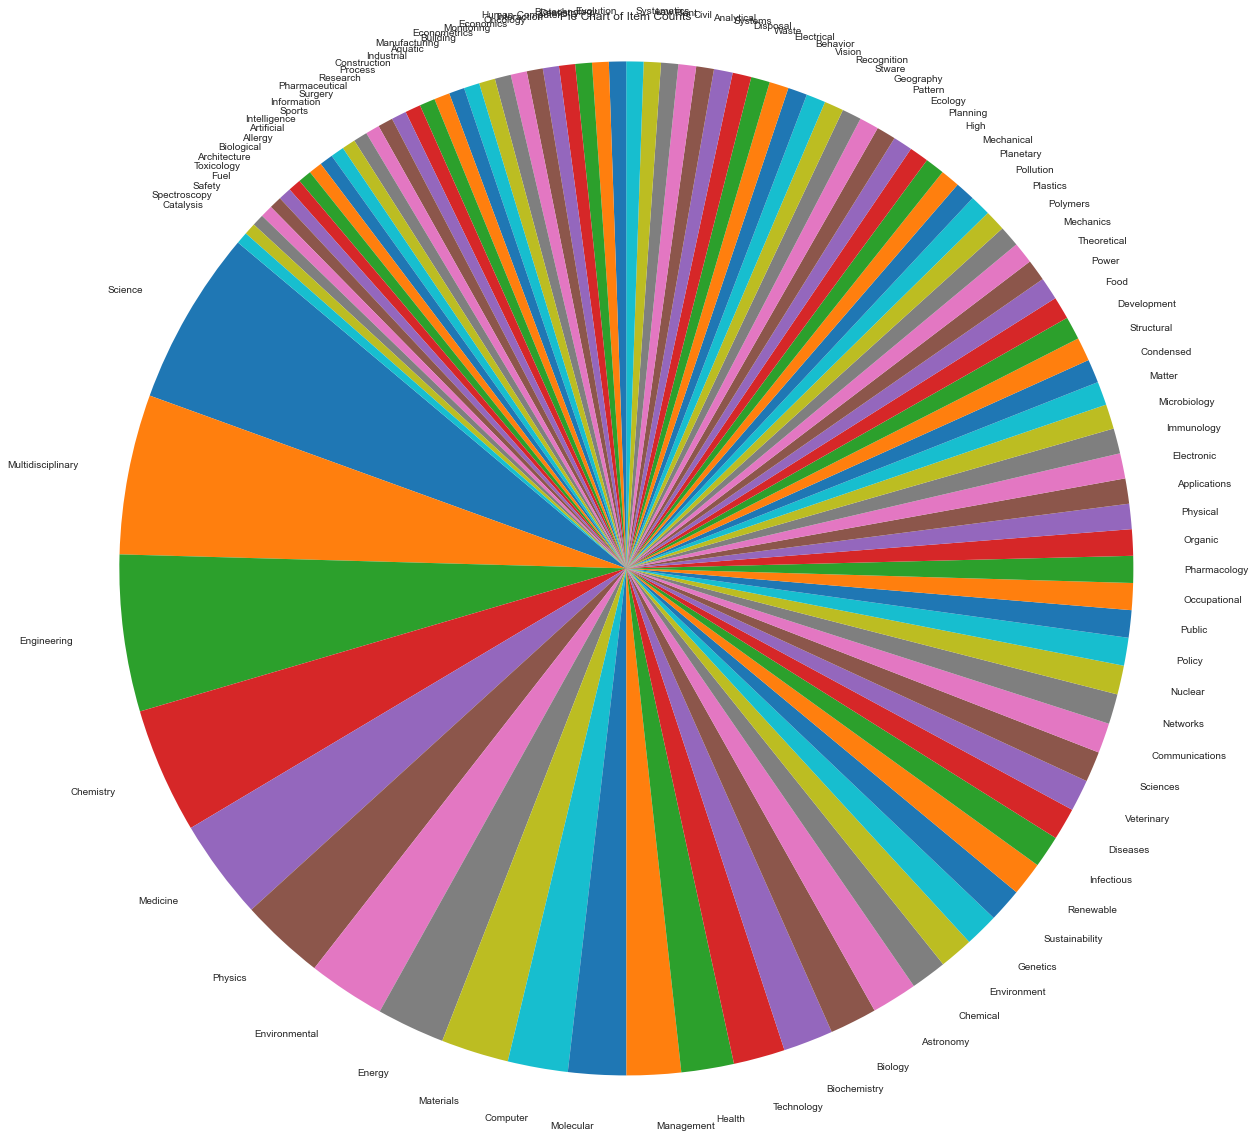

In [278]:
import seaborn as sns
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

# Convert Counter object to a DataFrame
df = pd.DataFrame.from_dict(count, orient='index').reset_index()
df.columns = ['Item', 'Count']

df = df.sort_values(by='Count', ascending=False)
df = df.head(100)

# Plot using Seaborn
plt.figure(figsize=(20, 20))
plt.pie(df['Count'], labels=df['Item'], startangle=140)
plt.title('Pie Chart of Item Counts')

plt.gca().set_facecolor('lightgrey')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [261]:
df = pd.DataFrame.from_dict(count, orient='index').reset_index()
df.columns = ['Item', 'Count']

df = df.sort_values(by='Count', ascending=False)

df.to_csv("topics.csv", index=False)

In [265]:
df["Count"].sum()

7758

In [ ]:
research_topics = [
    "Multidisciplinary",
    "Engineering",
    "Chemistry",
    "Medicine",
    "Physics",
    "Environmental",
    "Energy",
    "Materials",
    "Computer",
    "Molecular",
    "Biochemistry",
    "Biology",
    "Astronomy",
    "Genetics",
    "Infectious Diseases",
    "Veterinary Sciences",
    "Immunology",
    "Microbiology",
    "Structural",
    "Development",
    "Theoretical Mechanics",
    "Analytical",
    "Civil",
    "Plant",
    "Systematics",
    "Evolution",
    "Biotechnology",
    "Dentistry",
    "Oncology",
    "Pharmaceutical",
    "Surgery",
    "Neuroscience",
    "Virology",
    "Gastroenterology",
    "Hematology",
    "Agricultural",
    "Critical",
    "Crop",
    "Inorganic",
    "Astrophysics",
    "Dermatology",
    "Biophysics",
    "Pathology",
    "Forensic",
    "Nephrology",
    "Biomaterials",
    "Statistics",
    "Hepatology",
    "Pediatrics",
    "Epidemiology",
    "Political",
    "Psychology",
    "Rehabilitation",
    "Cellular",
    "Design",
    "Optics",
    "Obstetrics",
    "Fluid",
    "Physiology",
    "Electrochemistry",
    "Internal",
    "Surface",
    "Colloid",
    "Linguistics",
    "Geochemistry",
    "Philosophy",
    "Decision",
    "Paleontology",
    "Informatics",
    "Operations",
    "Anatomy",
    "Communication",
    "Number",
    "Medical",
    "Laboratory",
    "Diagnosis",
    "Psychiatric",
    "Archeology",
    "Community",
    "Cognitive"
]

In [268]:
df["Count"][0] * 0.7

32.9